# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [4]:
# Code Here

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import palmerpenguins


from palmerpenguins import load_penguins
penguins = load_penguins()
get_dummies = pd.get_dummies
from plotnine import *

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best? My Model 1 (All Variables-9) is the best model because it highest R sq and lowest MSE when compared to counterpart models.

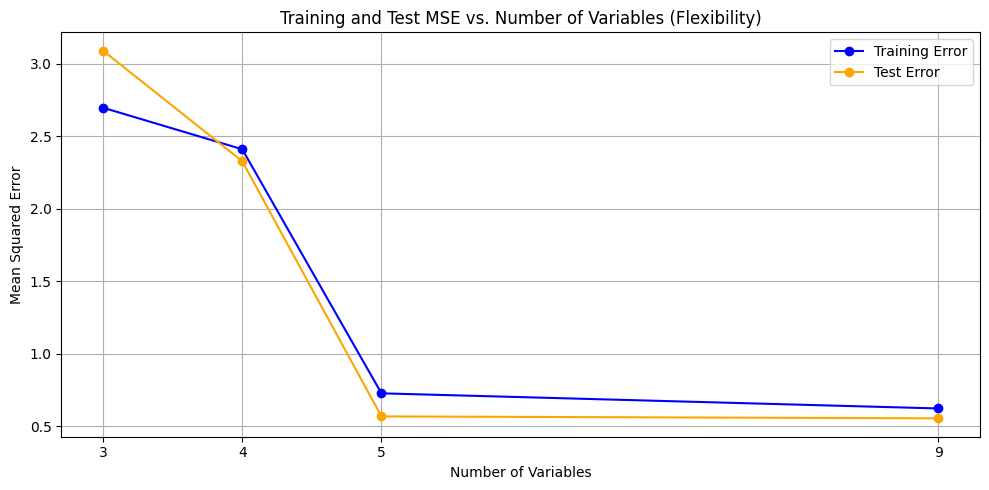

In [5]:

# Load your data
data = penguins

# Dummify categorical variables
data = pd.get_dummies(data, drop_first=True)

# Drop rows with missing target variable or impute as necessary
data = data.dropna(subset=['bill_depth_mm'])

# Define X (features) and y (target)
X = data.drop(columns=['bill_depth_mm'])
y = data['bill_depth_mm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with different sets of predictors
models = {
    'Model 1 (All Variables-9)': X_train,
    'Model 2 (Numeric Variables Only-4)': X_train.select_dtypes(include='number'),
    'Model 3 (Categorical Variables Only-5)': X_train.drop(columns=X_train.select_dtypes(include='number').columns),
    'Model 4 (Selected Variables-3)': X_train[['bill_length_mm', 'body_mass_g', 'species_Chinstrap']]
}

# Check the number of variables for each model and store them
num_variables = {name: X_subset.shape[1] for name, X_subset in models.items()}

# Fit models and calculate errors
training_errors = []
test_errors = []

for name, X_subset in models.items():
    model = LinearRegression()
    model.fit(X_subset, y_train)

    # Training error
    train_pred = model.predict(X_subset)
    train_error = mean_squared_error(y_train, train_pred)
    training_errors.append(train_error)

    # Test error
    test_subset = X_test[X_subset.columns]
    test_pred = model.predict(test_subset)
    test_error = mean_squared_error(y_test, test_pred)
    test_errors.append(test_error)

# Prepare data for plotting
x_values = list(num_variables.values())
model_names = list(num_variables.keys())

# Sort the variables and errors
sorted_indices = np.argsort(x_values)
sorted_x_values = np.array(x_values)[sorted_indices]
sorted_training_errors = np.array(training_errors)[sorted_indices]
sorted_test_errors = np.array(test_errors)[sorted_indices]

# Plot training and test errors
plt.figure(figsize=(10, 5))

# Plot training errors
plt.plot(sorted_x_values, sorted_training_errors, marker='o', label='Training Error', color='blue', linestyle='-')

# Plot test errors
plt.plot(sorted_x_values, sorted_test_errors, marker='o', label='Test Error', color='orange', linestyle='-')

# Customize plot
plt.xlabel('Number of Variables')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE vs. Number of Variables (Flexibility)')
plt.xticks(sorted_x_values)  # Show each count on the x-axis
plt.legend()
plt.tight_layout()
plt.grid()  # Optional: Add grid for better readability
plt.show()

#chat gpt was used when generating the code

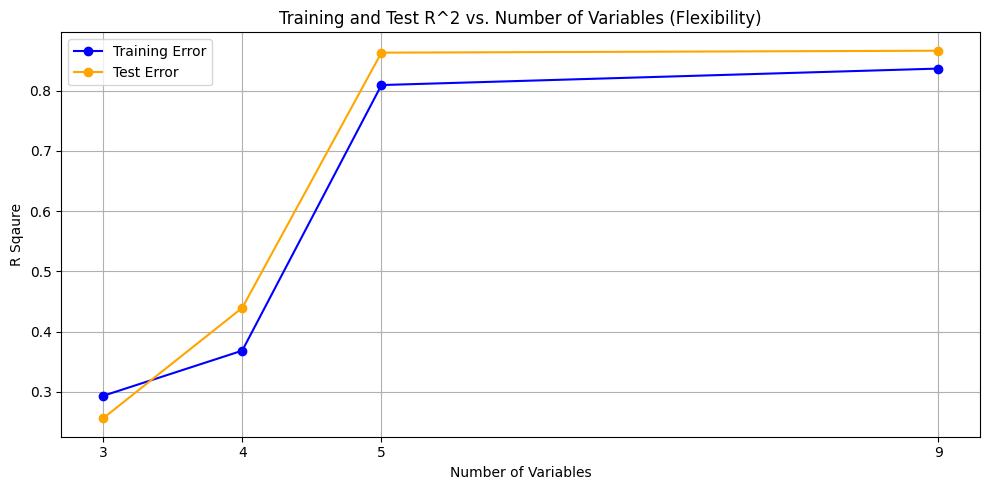

In [6]:
# Load your data
data = penguins

# Dummify categorical variables
data = pd.get_dummies(data, drop_first=True)

# Drop rows with missing target variable or impute as necessary
data = data.dropna(subset=['bill_depth_mm'])

# Define X (features) and y (target)
X = data.drop(columns=['bill_depth_mm'])
y = data['bill_depth_mm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with different sets of predictors
models = {
    'Model 1 (All Variables-9)': X_train,
    'Model 2 (Numeric Variables Only-4)': X_train.select_dtypes(include='number'),
    'Model 3 (Categorical Variables Only-5)': X_train.drop(columns=X_train.select_dtypes(include='number').columns),
    'Model 4 (Selected Variables-3)': X_train[['bill_length_mm', 'body_mass_g', 'species_Chinstrap']]
}

# Check the number of variables for each model and store them
num_variables = {name: X_subset.shape[1] for name, X_subset in models.items()}

# Fit models and calculate errors
training_errors = []
test_errors = []

for name, X_subset in models.items():
    model = LinearRegression()
    model.fit(X_subset, y_train)

    # Training error
    train_pred = model.predict(X_subset)
    train_error = r2_score(y_train, train_pred)
    training_errors.append(train_error)

    # Test error
    test_subset = X_test[X_subset.columns]
    test_pred = model.predict(test_subset)
    test_error = r2_score(y_test, test_pred)
    test_errors.append(test_error)

# Prepare data for plotting
x_values = list(num_variables.values())
model_names = list(num_variables.keys())

# Sort the variables and errors
sorted_indices = np.argsort(x_values)
sorted_x_values = np.array(x_values)[sorted_indices]
sorted_training_errors = np.array(training_errors)[sorted_indices]
sorted_test_errors = np.array(test_errors)[sorted_indices]

# Plot training and test errors
plt.figure(figsize=(10, 5))

# Plot training errors
plt.plot(sorted_x_values, sorted_training_errors, marker='o', label='Training Error', color='blue', linestyle='-')

# Plot test errors
plt.plot(sorted_x_values, sorted_test_errors, marker='o', label='Test Error', color='orange', linestyle='-')

# Customize plot
plt.xlabel('Number of Variables')
plt.ylabel('R Sqaure')
plt.title('Training and Test R^2 vs. Number of Variables (Flexibility)')
plt.xticks(sorted_x_values)  # Show each count on the x-axis
plt.legend()
plt.tight_layout()
plt.grid()  # Optional: Add grid for better readability
plt.show()

#chat gpt was used when generating the code